In [50]:
import intake
import pandas as pd
import xarray as xr
import numpy as np
import calendar
import geopandas as gp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from clisops.core.subset import subset_shape

ModuleNotFoundError: No module named 'clisops'

## Find data

In [3]:
cmip6 = intake.open_esm_datastore('/g/data/dk92/catalog/v2/esm/cmip6-fs38/catalog.json')

In [4]:
hist_subset = cmip6.search(
    source_id=['ACCESS-CM2'],
    experiment_id=['historical'],
    variable_id='pr',
    table_id='Amon',
    file_type='l',
    time_range=['195001-201412', '185001-201412'],
)

In [5]:
hist_subset.df.sort_values(by=['member_id'])

,path,file_type,realm,frequency,table_id,project_id,institution_id,source_id,experiment_id,member_id,variable_id,grid_label,version,time_range
7,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r10i1p1f1,pr,gn,v20220819,195001-201412
1,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,pr,gn,v20191108,185001-201412
8,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r2i1p1f1,pr,gn,v20191125,185001-201412
3,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r3i1p1f1,pr,gn,v20200306,185001-201412
6,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r4i1p1f1,pr,gn,v20210607,185001-201412
5,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r5i1p1f1,pr,gn,v20210607,185001-201412
4,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r6i1p1f1,pr,gn,v20220819,195001-201412
0,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r7i1p1f1,pr,gn,v20220819,195001-201412
2,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r8i1p1f1,pr,gn,v20220819,195001-201412
9,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARC...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r9i1p1f1,pr,gn,v20220819,195001-201412


In [6]:
hist_subset.df.iloc[0]['path']

'/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r7i1p1f1/Amon/pr/gn/v20220819/pr_Amon_ACCESS-CM2_historical_r7i1p1f1_gn_195001-201412.nc'

In [7]:
ssp_subset = cmip6.search(
    source_id=['ACCESS-CM2'],
    experiment_id=['ssp370'],
    variable_id='pr',
    table_id='Amon',
    file_type='l',
)

In [8]:
ssp_subset.df.sort_values(by=['member_id'])

,path,file_type,realm,frequency,table_id,project_id,institution_id,source_id,experiment_id,member_id,variable_id,grid_label,version,time_range
6,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r10i1p1f1,pr,gn,v20231017,201501-210012
2,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r1i1p1f1,pr,gn,v20191108,201501-210012
8,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r2i1p1f1,pr,gn,v20200303,201501-210012
4,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r3i1p1f1,pr,gn,v20200428,201501-210012
0,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r4i1p1f1,pr,gn,v20210712,201501-210012
3,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r5i1p1f1,pr,gn,v20210802,201501-210012
7,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r6i1p1f1,pr,gn,v20230506,201501-210012
5,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r7i1p1f1,pr,gn,v20231017,201501-210012
1,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r8i1p1f1,pr,gn,v20231017,201501-210012
9,/g/data/fs38/publications/CMIP6/ScenarioMIP/CS...,l,atmos,mon,Amon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,ssp370,r9i1p1f1,pr,gn,v20231017,201501-210012


In [9]:
ssp_subset.df.iloc[0]['path']

'/g/data/fs38/publications/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp370/r4i1p1f1/Amon/pr/gn/v20210712/pr_Amon_ACCESS-CM2_ssp370_r4i1p1f1_gn_201501-210012.nc'

## Create dataset

In [10]:
ds_hist_dict = hist_subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_type.project_id.institution_id.source_id.experiment_id.member_id.frequency.realm.table_id.variable_id.grid_label.version'


In [11]:
ds_hist = xr.concat(
    list(ds_hist_dict.values()),
    pd.Index(hist_subset.df['member_id'].values, name='member_id'),
)

In [12]:
ds_hist_clim = ds_hist.sel(time=slice('1985-01-01', '2014-12-31')).groupby('time.month').mean('time')

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [13]:
ds_hist_clim

<xarray.Dataset> Size: 14MB
Dimensions:    (month: 12, member_id: 10, lat: 144, lon: 192, bnds: 2)
Coordinates:
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * member_id  (member_id) object 80B 'r7i1p1f1' 'r1i1p1f1' ... 'r9i1p1f1'
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    pr         (month, member_id, lat, lon) float32 13MB dask.array<chunksize=(1, 1, 144, 192), meta=np.ndarray>
    lat_bnds   (month, member_id, lat, bnds) float64 276kB dask.array<chunksize=(12, 1, 144, 2), meta=np.ndarray>
    lon_bnds   (month, member_id, lon, bnds) float64 369kB dask.array<chunksize=(12, 1, 192, 2), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            36524.0
    creation_date:                    2020-03-05T23:49:53Z
    ...                               ...
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20200306
    intake_esm_attrs:time_range:      185001-201412
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           l.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historic...

In [14]:
ds_ssp_dict = ssp_subset.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_type.project_id.institution_id.source_id.experiment_id.member_id.frequency.realm.table_id.variable_id.grid_label.version'


In [15]:
ds_ssp = xr.concat(
    list(ds_ssp_dict.values()),
    pd.Index(ssp_subset.df['member_id'].values, name='member_id'),
)

In [16]:
ds_ssp_clim = ds_ssp.sel(time=slice('2070-01-01', '2099-12-31')).groupby('time.month').mean('time')

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:find_group_cohorts: cohorts is preferred, chunking is perfect.
INFO:flox:_choose_method: method is None
INFO:flox:_choose_method: choosing preferred_method=cohorts
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False


In [17]:
ds_ssp_clim

<xarray.Dataset> Size: 14MB
Dimensions:    (month: 12, member_id: 10, lat: 144, lon: 192, bnds: 2)
Coordinates:
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * member_id  (member_id) object 80B 'r4i1p1f1' 'r8i1p1f1' ... 'r9i1p1f1'
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    pr         (month, member_id, lat, lon) float32 13MB dask.array<chunksize=(1, 1, 144, 192), meta=np.ndarray>
    lat_bnds   (month, member_id, lat, bnds) float64 276kB dask.array<chunksize=(12, 1, 144, 2), meta=np.ndarray>
    lon_bnds   (month, member_id, lon, bnds) float64 369kB dask.array<chunksize=(12, 1, 192, 2), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      ScenarioMIP AerChemMIP
    branch_method:                    standard
    branch_time_in_child:             60265.0
    branch_time_in_parent:            60265.0
    creation_date:                    2021-07-12T07:17:01Z
    ...                               ...
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20210712
    intake_esm_attrs:time_range:      201501-210012
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           l.CMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp370.r...

In [18]:
ds_change = ((ds_ssp_clim - ds_hist_clim) / ds_hist_clim) * 100

In [19]:
ds_change = ds_change.compute()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [20]:
ds_change

<xarray.Dataset> Size: 14MB
Dimensions:    (lat: 144, lon: 192, member_id: 10, month: 12, bnds: 2)
Coordinates:
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * member_id  (member_id) object 80B 'r4i1p1f1' 'r8i1p1f1' ... 'r9i1p1f1'
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    pr         (month, member_id, lat, lon) float32 13MB 46.41 48.46 ... 240.2
    lat_bnds   (month, member_id, lat, bnds) float64 276kB -0.0 -0.0 ... 0.0 0.0
    lon_bnds   (month, member_id, lon, bnds) float64 369kB nan 0.0 ... 0.0 0.0

## Plotting

In [21]:
shape = gp.read_file('/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp')

In [48]:
increase = ds_change['pr'] > 0
count = increase.sum(dim='month')

In [49]:
count = subset_shape(count, shape=shape)
p = count.plot(
    col='member_id',
    transform=ccrs.PlateCarree(),
#    cmap=cmap,
#    figsize=[20, 5.5],
    subplot_kws={'projection': ccrs.PlateCarree(),},
    levels=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5],
)
#fig.colorbar(
#    cax,
#    ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#   label='number of months',
#) 
xmin = 112.92
xmax = 153.63
ymin = -43.625
ymax = -10.07
for ax in p.axes.flat:
    ax.set_extent([xmin, xmax, ymin, ymax], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)

plt.sup_title('Number of months where the climatological mean increases')
plt.show()

NameError: name 'subset_shape' is not defined

In [22]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Mildura': (-34.2, 142.1),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Karlamilyi National Park': (-22.7, 122.2),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

In [23]:
lat, lon = city_lat_lon['Sydney']

In [24]:
point_selection = {'lat': lat, 'lon': lon}
da_change_point = ds_change['pr'].sel(point_selection, method='nearest').compute()

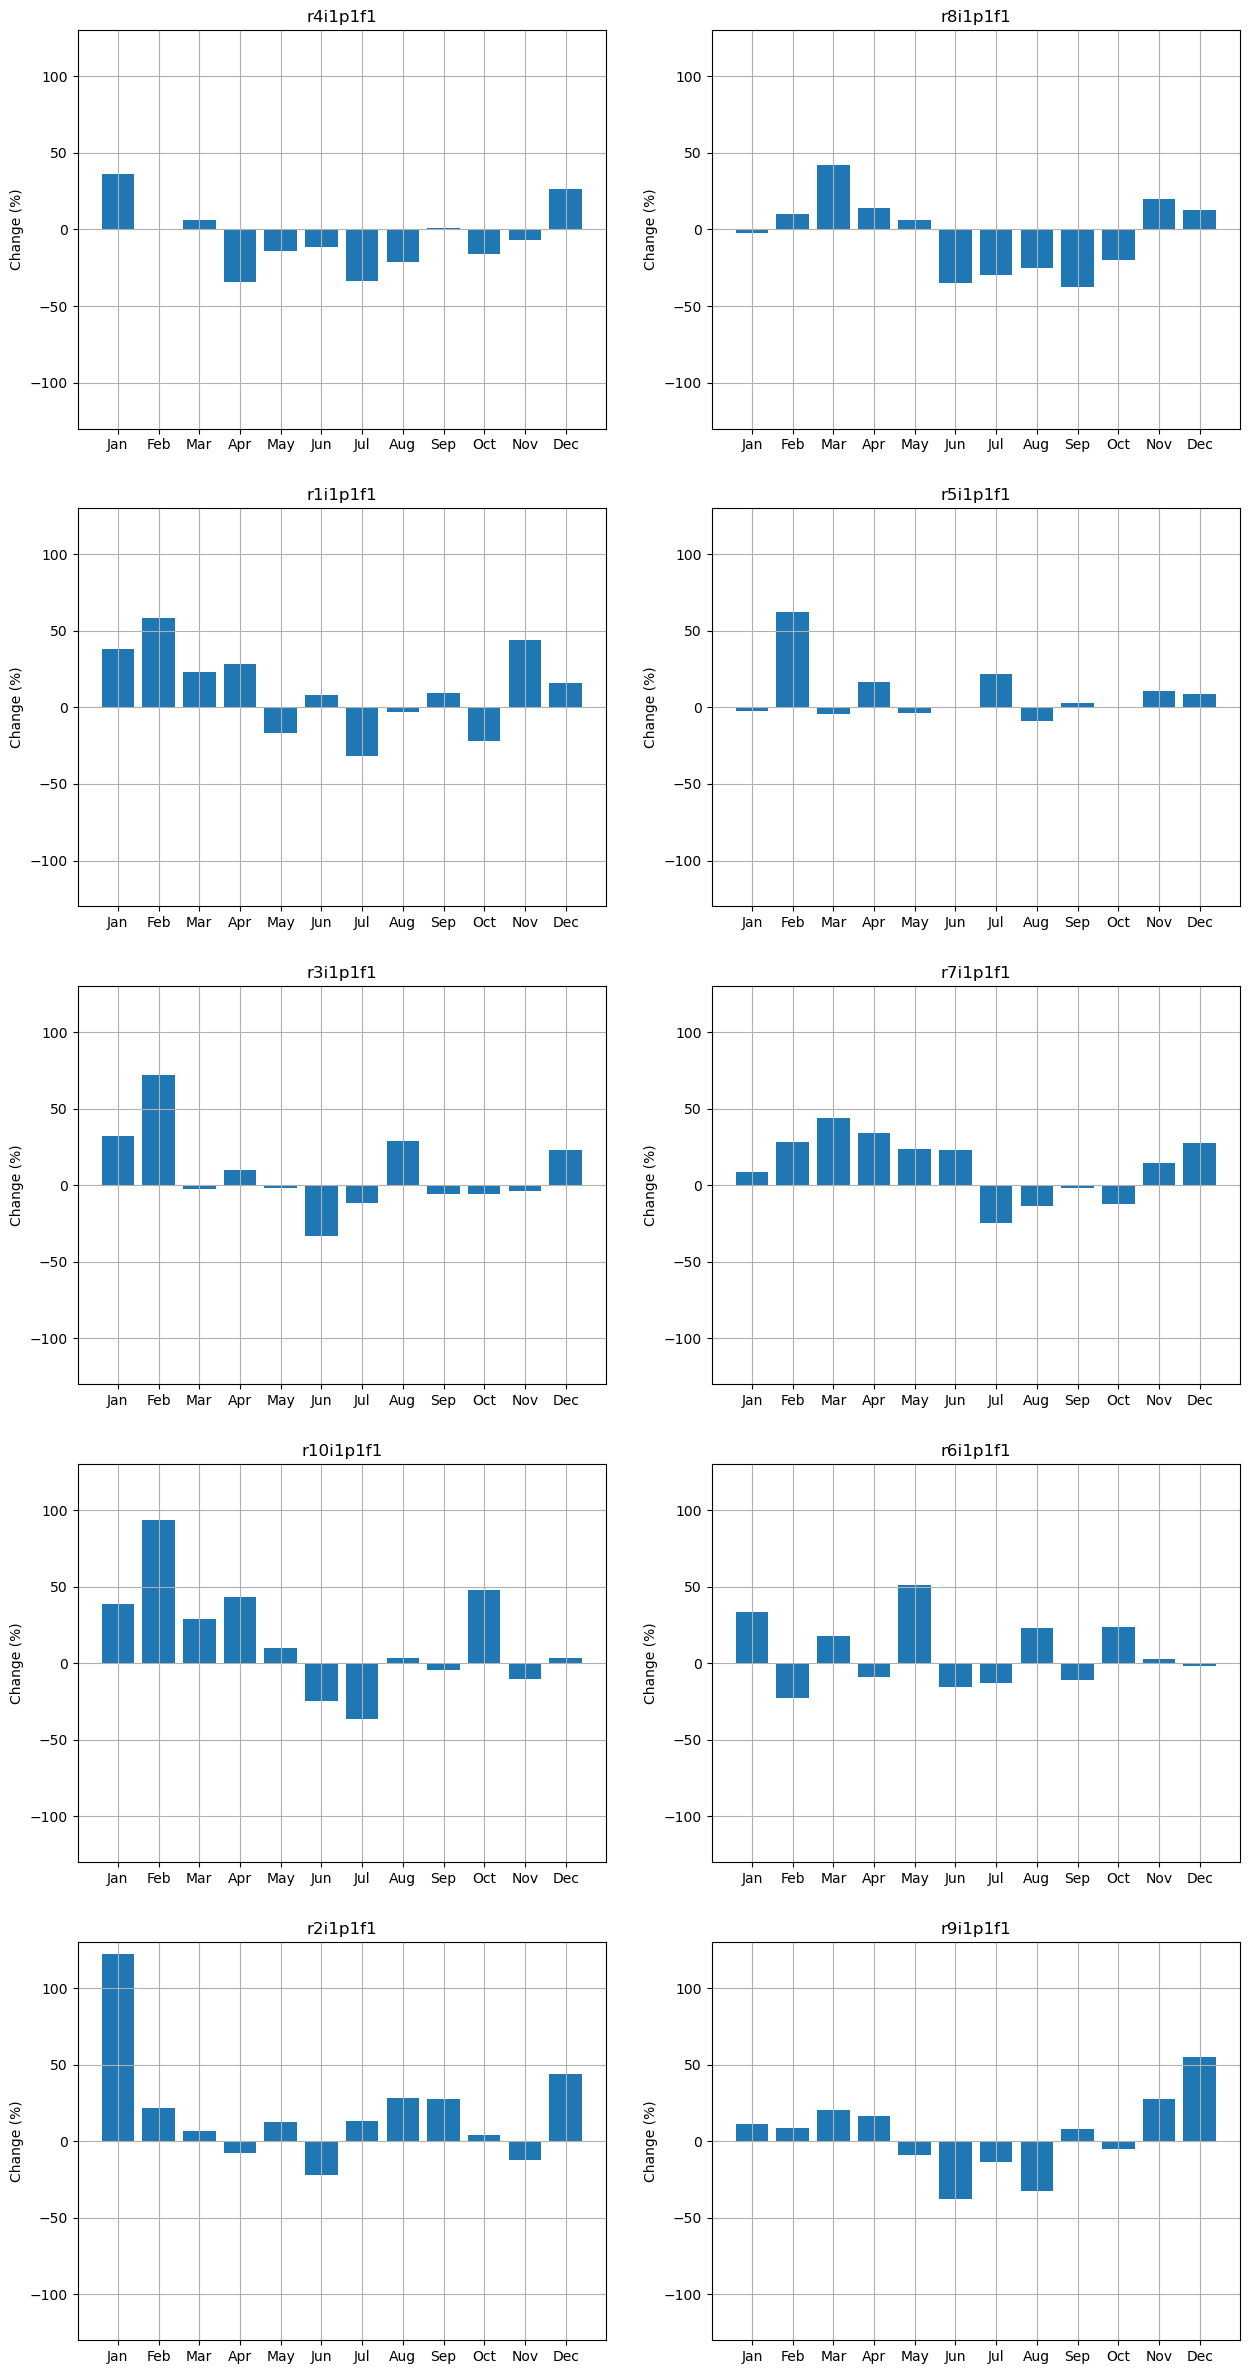

In [47]:
xticks = np.arange(1, 13)
xtick_labels = [calendar.month_abbr[i] for i in xticks]
fig, axs = plt.subplots(5, 2, figsize=(15, 30))
axs = axs.flatten()
for num, ax in enumerate(axs):
    da_change_point_member = da_change_point.isel({'member_id': num})
    member_id = str(da_change_point_member['member_id'].values)
    ax.bar(xticks, da_change_point_member)
    ax.set_title(member_id)
    ax.set_ylabel('Change (%)')
    ax.set_xticks(xticks, xtick_labels)
    ax.set_ylim(-130, 130)
    ax.grid()
plt.show()